# OpenSBLI Benchmark

This notebook compares the peformance of the OpenSBLI Taylor-Green vortex medium (512), strong scaling benchmark on different systems.

Performance is compared using iterations per second.

## Setup Section

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip, sysinfo
from appanalysis import osbli

In [4]:
sysdetails = sysinfo.getdetails('../../../systems.yaml')

## Calculate performance

In [5]:
systems = ['ARCHER','Athena','Cirrus','Thomas','Tesseract','CSD3-Skylake','Isambard','EPCC-CascadeLake']
perf = {}
notes = {}
names = {}
nodes = {}
perf_max = {}
cpn = {}

for system in systems:
    wdir = '../TGV512ss/results/' + system
    filelist = filemanip.get_filelist(wdir, 'output_')
    sysdict = sysdetails[system]
    names[system] = sysdict['Name']
    cpn[system] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(sysdict['Name'])
    osbli_df = pd.DataFrame(osbli.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[system], perf_max[system] = osbli.get_perf_stats(osbli_df, 'max', writestats=True)
    print('\n============================================================')


ARCHER
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
1     24     0.098877  0.099615  0.100009  0.099593     5
2     48     0.204781  0.204781  0.204781  0.204781     1
4     96     0.346255  0.346255  0.346255  0.346255     1
8     192    0.702514  0.702514  0.702514  0.702514     1
16    384    1.518518  1.518518  1.518518  1.518518     1
32    768    2.850164  2.850164  2.850164  2.850164     1


Athena
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
1     28     0.102653  0.104152  0.104436  0.103921     5


Cirrus
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
1     36     0.130198  0.134866  0.135301  0.1

## Plot performance

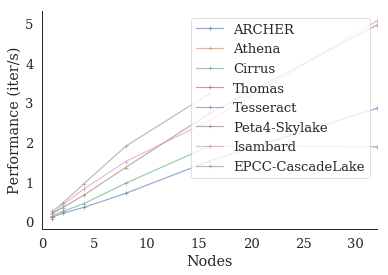

In [6]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
plt.xlim((0,32))
plt.xlabel('Nodes')
plt.ylabel('Performance (iter/s)')
plt.legend(loc='best')
sns.despine()
# plt.savefig('OSBLI_TGV512ss_perf.png', dpi=300)

## Compare performance: single node

In [7]:
n_baseperf = perf_max['ARCHER'][0]
c_baseperf = perf_max['ARCHER'][0]/cpn['ARCHER']

print("Performance improvement relative to ARCHER:\n")
print("{:>30s} {:>15s} {:>15s}".format('System', 'Perf (iter/s)', 'Improvement'))
print("{:>30s} {:>15s} {:>15s}".format('======', '=============', '==========='))
print("Single node")
for system in systems:
    print("{:>30s} {:>15.5f} {:>15.3f}".format(system, perf_max[system][0], perf_max[system][0]/n_baseperf))

print("\n")

print("per-core")
for system in systems:
    cperf = perf_max[system][0]/cpn[system]
    print("{:>30s} {:>15.5f} {:>15.3f}".format(system, cperf, cperf/c_baseperf))

Performance improvement relative to ARCHER:

                        System   Perf (iter/s)     Improvement
                        ======   =============     ===========
Single node
                        ARCHER         0.10001           1.000
                        Athena         0.10444           1.044
                        Cirrus         0.13530           1.353
                        Thomas         0.06536           0.654
                     Tesseract         0.09723           0.972
                  CSD3-Skylake         0.19748           1.975
                      Isambard         0.19114           1.911
              EPCC-CascadeLake         0.24715           2.471


per-core
                        ARCHER         0.00417           1.000
                        Athena         0.00373           0.895
                        Cirrus         0.00376           0.902
                        Thomas         0.00272           0.654
                     Tesseract         0.00405    